In [3]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir('../..')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Infiles

In [115]:
infiles = glob.glob('s2-differential_expression.dir/*')

### Computation

In [158]:
# Create list
dataframe_list = []
for infile in infiles:
    dataframe = pd.read_table(infile)
    dataframe['gene_symbol'] = os.path.basename(infile).split('-')[0]
    dataframe_list.append(dataframe)

# Merge
concatenated_dataframe = pd.concat(dataframe_list)
concatenated_dataframe['signature'] = [str(x) + '_' + str(y) + '_' + str(z) for x,y,z in concatenated_dataframe[['drug_name', 'timepoint', 'concentration']].as_matrix()]
concatenated_dataframe.head()

,concentration,drug_name,fraction,logfc,pvalue,statistic,timepoint,bonferroni_pvalue,gene_symbol,signature
0,0.1000,Dasatinib,cytosolic,1.748096,1.060639e-249,361629.0,24h,3.563748e-247,Actin,Dasatinib_24h_0.1
1,0.0100,Neratinib,cytosolic,0.770926,1.233089e-137,1219657.5,24h,4.143178e-135,Actin,Neratinib_24h_0.01
2,1.0000,Dasatinib,cytosolic,2.073158,9.052405e-96,278619.5,24h,3.041608e-93,Actin,Dasatinib_24h_1.0
3,0.1000,Etoposide,cytosolic,0.830611,6.792852e-148,1332001.0,24h,2.282398e-145,Actin,Etoposide_24h_0.1
4,0.0001,Paclitaxel,cytosolic,0.768264,9.072027e-152,1734427.0,24h,3.048201e-149,Actin,Paclitaxel_24h_0.0001


In [171]:
%%html
<style>
.output .output_area:first-child {
    display: none;
}
</style>

In [164]:
def plot_fraction_heatmap(concatenated_dataframe, fraction='cytosolic'):
    
    # Make FC dataframe
    concatenated_dataframe = concatenated_dataframe.copy()
    concatenated_dataframe['signature'] = [str(x) + '_' + str(y) + '_' + str(z) for x,y,z in concatenated_dataframe[['drug_name', 'timepoint', 'concentration']].as_matrix()]
    logfc_dataframe = pd.pivot_table(concatenated_dataframe[concatenated_dataframe['fraction']=='cytosolic'], index='gene_symbol', columns='signature', values='logfc')
    
    # Annotate
    sample_annotation_dataframe = pd.DataFrame(pd.Series(logfc_dataframe.columns)).set_index('signature')
    sample_annotation_dataframe['drug'] = [str(x.split('_')[0].replace('h', '')) for x in sample_annotation_dataframe.index]
    sample_annotation_dataframe['timepoint'] = [int(x.split('_')[1].replace('h', '')) for x in sample_annotation_dataframe.index]
    sample_annotation_dataframe['concentration'] = [float(x.split('_')[2].replace('h', '')) for x in sample_annotation_dataframe.index]

    # Plot
    %R -i logfc_dataframe,sample_annotation_dataframe,fraction
    %R -h 500 -w 1000 pheatmap(logfc_dataframe, color = colorRampPalette(c('navyblue', 'white', 'red3'))(100), annotation_col = sample_annotation_dataframe, border_color=NA, main=paste0('Gene logFC variation across signatures, ', fraction, '\n'), breaks=seq(-max(abs(logfc_dataframe)), max(abs(logfc_dataframe)), length.out=101))

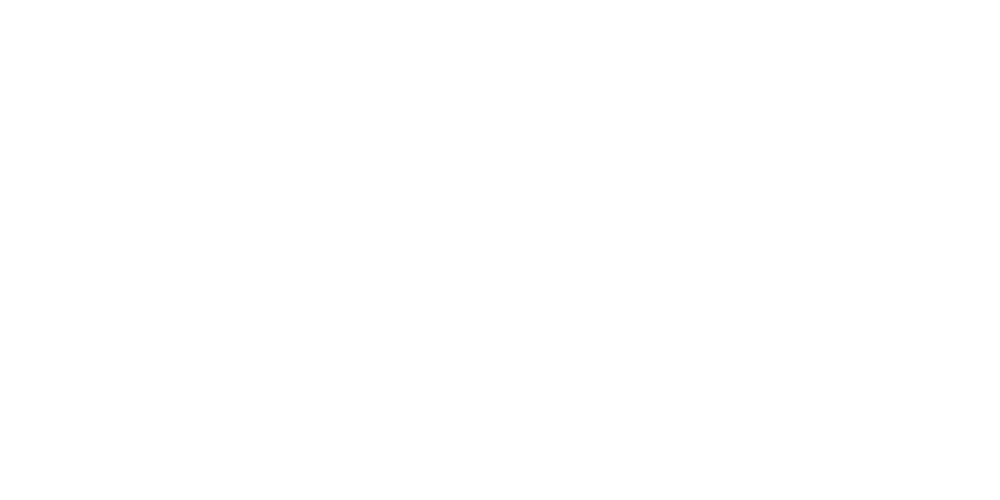

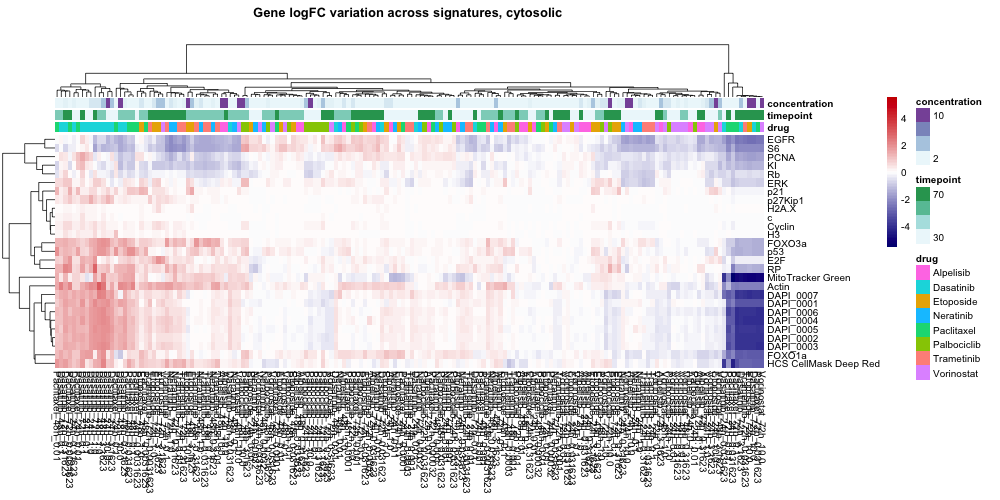

In [153]:
plot_fraction_heatmap(concatenated_dataframe, fraction='cytosolic')

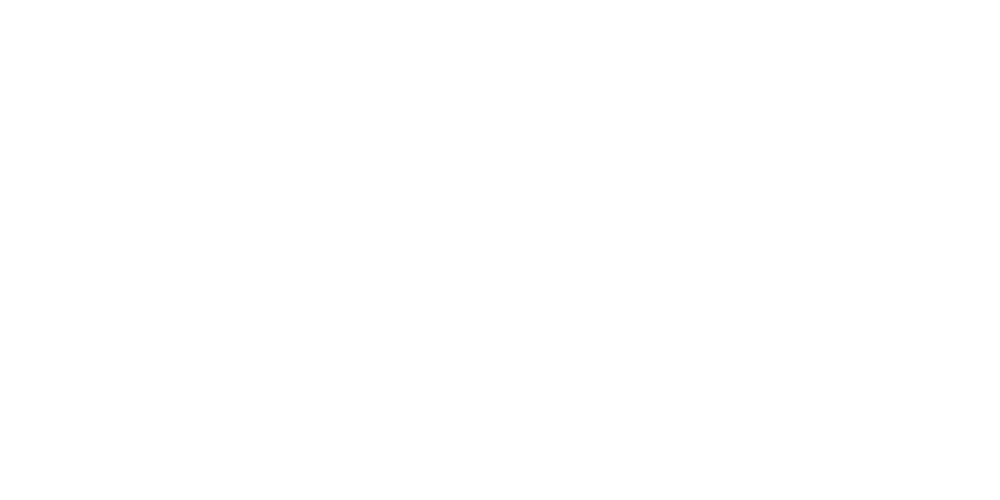

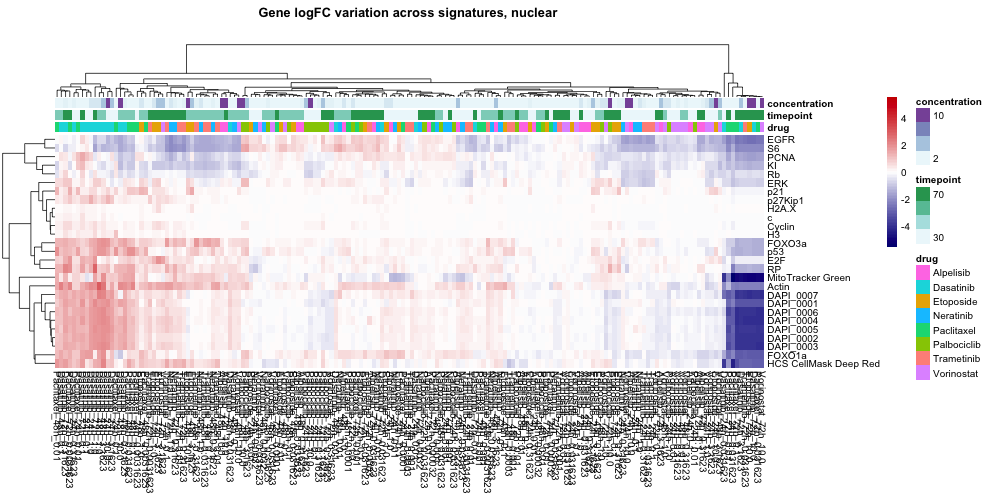

In [154]:
plot_fraction_heatmap(concatenated_dataframe, fraction='nuclear')